# Assignemnt 2

## 1 Set up 

### 1.1 Install Dependencies 

In [1]:
!pip install tensorflow opencv-python matplotlib
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip show tensorflow


Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\sarit\appdata\roaming\python\python39\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
#!pip list


In [4]:
import tensorflow as tf # using this uses up all the ram, not because google made it and it has a history of eating up all the ram 
#solving environment with a frozen solve failed
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import math 
import cv2 # computer vision module
import re
import math 
import imghdr #check file extensions for our paarticular images
import time
from tqdm import tqdm
import seaborn as sns
import numpy as np 
import pandas as pd 
import mtcnn
from mtcnn.mtcnn import MTCNN

sns.set_style('dark')

### 1.2 Setting up the GPU

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#GPU not available?
#CUDA nad cuDNN are needed in order to use GPU.
#Older versions are suggested as a complete solutions, unfortunately drivers cannpt be rolled back on this available machine

Num GPUs Available:  0


In [6]:
tf.__version__, np.__version__

('2.12.0', '1.23.5')

In [7]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"  # Specify the GPU device IDs to use, e.g., GPU 0 and GPU 1

In [8]:
# importing the tensorflow package
import tensorflow as tf
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda()
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

False

In [9]:
#print(tf.debugging.set_log_device_placement(True))

# Place tensors on the CPU
#with tf.device('/CPU:0'):
#  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
#c = tf.matmul(a, b)
#print(c)

In [10]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    #no GPU detected

### 1.2 Folder Structure

## 2 

### 2.1 Untar Labelled Faces in the Wild Dataset

### 2.2 Collect Positive and Anchor Classes

## 3 Load and Process Images

In [11]:
import cv2 # computer vision module
import imghdr

In [12]:
data_dir= 'images'

In [13]:
#os.listdir(data_dir)

In [14]:
os.listdir(os.path.join(data_dir,'robert_downey_jr'))

['robert_downey_jr1.png',
 'robert_downey_jr10.png',
 'robert_downey_jr11.png',
 'robert_downey_jr12.png',
 'robert_downey_jr13.png',
 'robert_downey_jr14.png',
 'robert_downey_jr15.png',
 'robert_downey_jr16.png',
 'robert_downey_jr17.png',
 'robert_downey_jr18.png',
 'robert_downey_jr19.png',
 'robert_downey_jr2.png',
 'robert_downey_jr20.png',
 'robert_downey_jr21.png',
 'robert_downey_jr22.png',
 'robert_downey_jr23.png',
 'robert_downey_jr24.png',
 'robert_downey_jr25.png',
 'robert_downey_jr26.png',
 'robert_downey_jr27.png',
 'robert_downey_jr28.png',
 'robert_downey_jr29.png',
 'robert_downey_jr3.png',
 'robert_downey_jr30.png',
 'robert_downey_jr31.png',
 'robert_downey_jr32.png',
 'robert_downey_jr33.png',
 'robert_downey_jr34.png',
 'robert_downey_jr35.png',
 'robert_downey_jr36.png',
 'robert_downey_jr37.png',
 'robert_downey_jr38.png',
 'robert_downey_jr39.png',
 'robert_downey_jr4.png',
 'robert_downey_jr40.png',
 'robert_downey_jr41.png',
 'robert_downey_jr42.png',
 'rob

In [15]:
image_extensions = ['jpeg','jpg','bmp','png']
image_extensions

['jpeg', 'jpg', 'bmp', 'png']

In [16]:
# Defining a list of class names for each Avenger
class_names = ["Chris Evans", "Chris Hemsworth", "Mark Ruffalo", "Robert Downey Jr", "Scarlett Johansson"]


In [17]:
#looping though the folder with all the image folders labelled with persosn's name 
for image_folder in os.listdir(data_dir):
    #loop throug every single folder with image we got in theose folders
    for image in os.listdir(os.path.join(data_dir,image_folder)):
        #print(image)
        #saving the path of an image inside the labelled folder inside the data folder
        image_path = os.path.join(data_dir,image_folder,image)
        try:
            #opening the image
            img = cv2.imread(image_path) 
            img.shape
            tip = imghdr.what(image_path)
            if tip  not in image_extensions:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
        except Exception as e:
                       print('Issue with image {}'.format(image_path))
                       os.remove(image_path)
        

### 3.1 Load images

<function matplotlib.pyplot.show(close=None, block=None)>

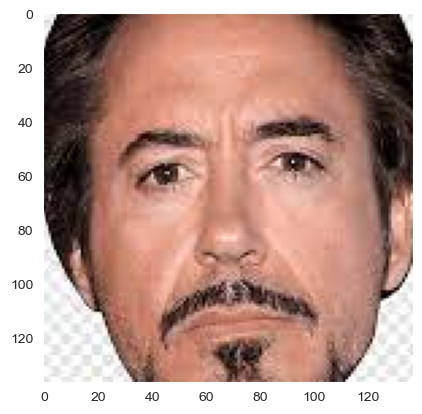

In [18]:
from matplotlib import pyplot as plt


img = cv2.imread(os.path.join('images','robert_downey_jr','robert_downey_jr1.png' ))
converted = plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show

(137, 137, 3)


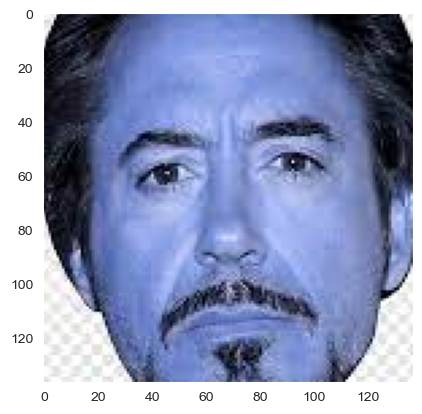

In [19]:
import matplotlib.pyplot as plt
import numpy as np
grayscale_image = np.mean(img, axis=2)
rgb_pixels = np.stack((grayscale_image, grayscale_image, grayscale_image), axis=2)
print(rgb_pixels.shape)
plt.imshow(img)
plt.show()

### Image cropping and normalizing

1/1 [==============================] - 0s 113ms/step


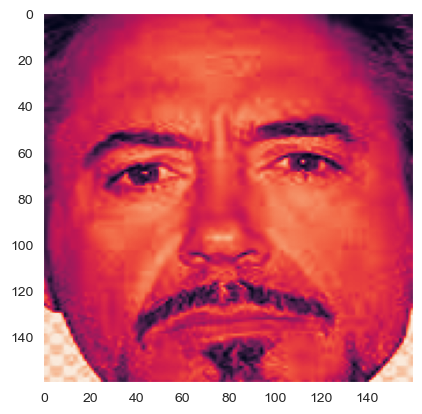

In [20]:
from PIL import Image

def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)  # Open the image file using the Image module from PIL or Pillow
    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    image = image.convert('RGB') # image converted to RGB
    pixels = np.asarray(image) #image transformed into an NumPyArray
    results = detector.detect_faces(pixels)

    x1, y1, width, height = results[0]['box']
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]

    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face


detector = MTCNN()
face_pixels = extract_face_from_file('images/robert_downey_jr/robert_downey_jr1.png')

plt.imshow(face_pixels)

### Identifying Faces

In [21]:
detector = MTCNN()
results = detector.detect_faces(rgb_pixels)
for result in results:
    print(result)

1/1 [==============================] - 0s 106ms/step
{'box': [14, 0, 115, 146], 'confidence': 0.9899280667304993, 'keypoints': {'left_eye': (45, 59), 'right_eye': (94, 55), 'nose': (67, 86), 'mouth_left': (52, 115), 'mouth_right': (93, 112)}}


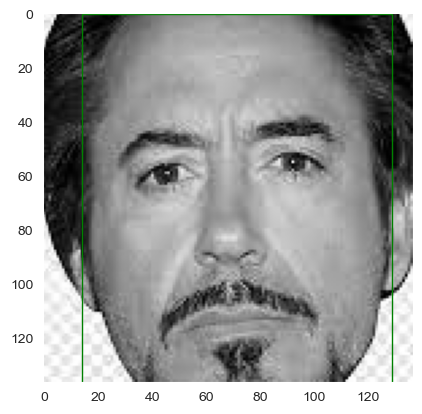

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_image_with_boxes(data, result_list):
    data = data.astype('int') / 255.0 # Normalize the image data to [0, 1]
    plt.imshow(data) # Display the image
    
    ax = plt.gca() # Get the current axes instance
    
    # Iterate over each face detection result
    for result in result_list:
        x, y, width, height = result['box'] # Extract the bounding box coordinates
        rect = Rectangle((x, y), width, height, fill=False, color='green') # Create a rectangle patch
        ax.add_patch(rect)  # Add the rectangle patch to the axes
       
    plt.show()   # Show the image with bounding boxes

draw_image_with_boxes(rgb_pixels, results)

In [23]:
import numpy as np
from matplotlib import pyplot as plt


In [24]:
#tf.keras.utils.image_dataset_from_directory??

In [58]:
#labelling,class building,preprocessing=resizing
# Load the dataset
data = tf.keras.utils.image_dataset_from_directory('images', batch_size=32)

# Iterate over the dataset and check the shape of the label data
for images, labels in data:
    print(labels.shape)
    break  # Print the shape of the first batch only


Found 274 files belonging to 5 classes.
(32,)


In [59]:
# allow accessing generator from our data pipeline
data_iterator = data.as_numpy_iterator()
data_iterator


In [60]:
#grabbing consecutive batches using iterator
batch = data_iterator.next()

# Reshape batch of images
#batch_images = tf.reshape(batch[0], [-1, 256, 256, 3])
# Check the shape of the reshaped batch
#print(batch_images.shape)  # Output: (batch_size, 256, 256, 3)

In [61]:
batch[1]


array([4, 4, 1, 2, 3, 1, 1, 2, 2, 4, 0, 3, 3, 0, 1, 4, 4, 2, 0, 2, 0, 2,
       2, 4, 1, 0, 2, 1, 2, 2, 2, 4])

In [62]:
print(batch[1].shape)  # Using the shape attribute
print(np.shape(batch[1]))  # Using np.shape() function


(32,)
(32,)


In [63]:
#2 parts of this data,
#image representation[from directory loaded as an array] and
#labeles
len(batch)

2

In [64]:
batch[1] # these represent labels
#but which class represents which number?
# Creating a dictionary



array([4, 4, 1, 2, 3, 1, 1, 2, 2, 4, 0, 3, 3, 0, 1, 4, 4, 2, 0, 2, 0, 2,
       2, 4, 1, 0, 2, 1, 2, 2, 2, 4])

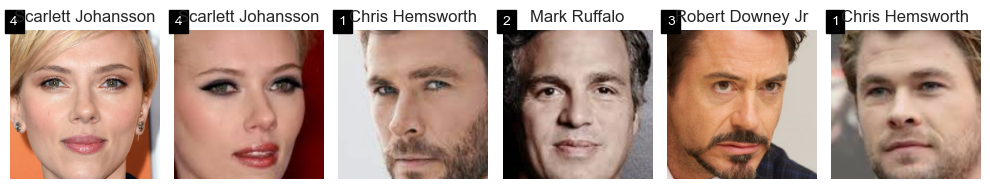

In [65]:
#double check which class is assigned to which type of image?
fig, ax = plt.subplots(ncols=6, figsize=(10, 10))
for idx, img in enumerate(batch[0][:6]):
    
    
    ax[idx].set(title = class_names[batch[1][idx]])
    ax[idx].imshow(img.astype(int))
    ax[idx].text(0, -10, batch[1][idx], color='white', fontsize=10, backgroundcolor='black')
    ax[idx].axis('off')

    
    
plt.tight_layout()
plt.show()


#NEED NAME FOR THE NUMBERS



## 3.2 Process Data

Scaling image values between 0 and 1 instead of 255.Helps the deep learning model generate faster and produce better results

### 3.2.1 Scale data

In [66]:
batch[0].min()

0.0

In [67]:
batch[0].max()

255.0

In [68]:
scaled = batch[0]/255
scaled.max()

1.0

In [69]:
#inside data pipeline there's function 'map'
#allowing us to apply a particular type of transformation
# as our data is being preporcessed throught the data pipeline
#when pre-fetching data it's gonna do that transformation as well
#it speeds up how quickly we can access our data from our disk
#lambda enables us to do the transformation
#x are images, independent features
#y is our target variables
scaled = data.map(lambda x,y: (x/255,y)) 


In [70]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

255.0

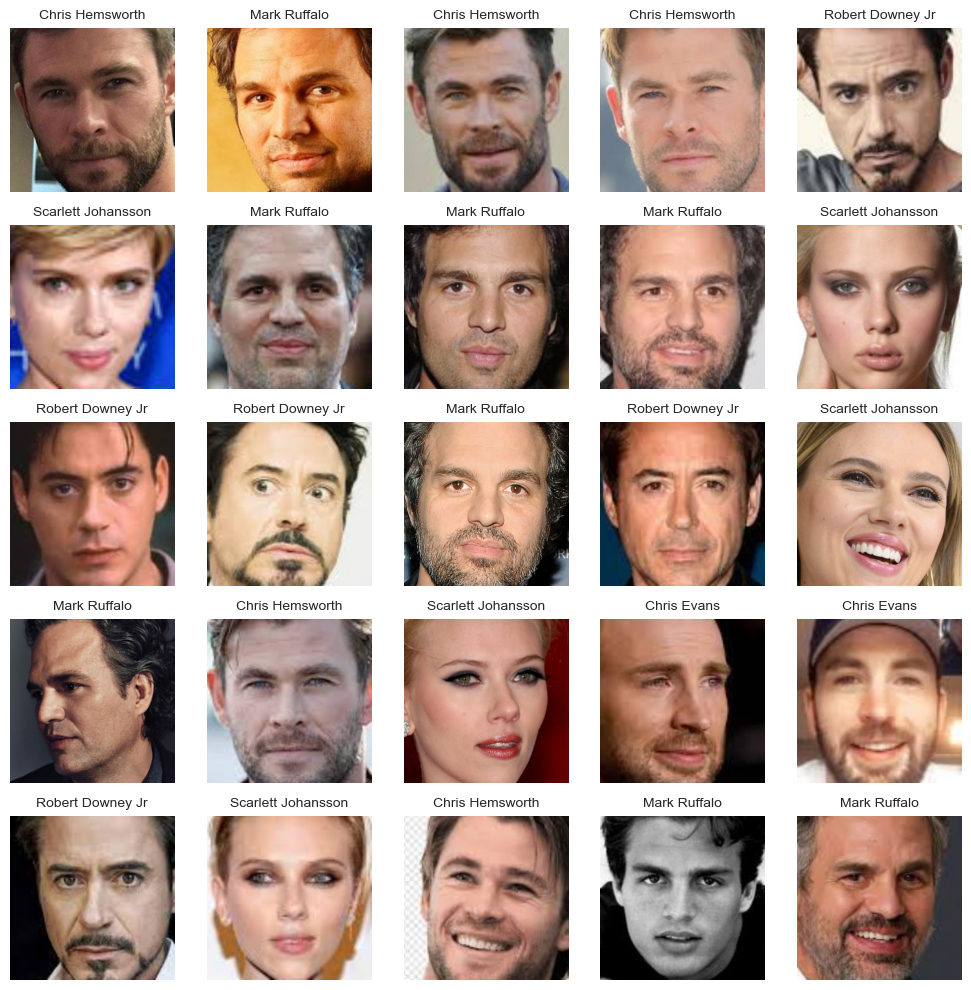

In [71]:
#double check which class is assigned to which type of image?
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for idx, img in enumerate(batch[0][:25]):
    row = idx // 5  # Determine the row index
    col = idx % 5  # Determine the column index

    ax[row, col].imshow(img.astype(int))
    ax[row, col].set_title(class_names[batch[1][idx]], fontsize=10)
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()


### 3.2.2 Split data

split data between training testing and validation to ensude we don't overfit

In [72]:
#number of batches
len(data)

9

In [73]:
print(batch[1].shape)  # Using the shape attribute
print(np.shape(batch[1]))  # Using np.shape() function


(32,)
(32,)


In [74]:
train_size= int(len(data)*.7)
print(train_size)
validate_size = int(len(data)*.2)+1
print(validate_size)
test_size = int(len(data)*0.1)+1
print(test_size)
print(test_size+validate_size+train_size)

6
2
1
9


In [75]:
# how many batches we want to allocate to our training data
#data is already shuffleded, neeeds to be shuffleed before this
train= data.take(train_size)
validate =data.take(train_size).take(validate_size)
test =data.take(train_size+validate_size).take(test_size)

## 4. Deep Model

In [76]:
from tensorflow.keras.models import Sequential, Model #for quick and easy classification
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout #for convolutional neural network
#condensing layer, returns the max layer
#Fully connected layer
#from convolutional layer reduced to a format the dense layer can take 1 output at the end
# used for regularisation
#first form an architecture: bunch of layers or hidden layers together forming a deep neural network


### 4.1 Buld Deep Learning Model

In [77]:
#class https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
#Sequential groups a linear stack of layers into a tf.keras.Model.
model = Sequential()

In [89]:
#layers for convolutional 

#first layer
#architectural decisions:
    #16 filters to condense or extract relevant info from image to make classification
    #filter of 3x3 in size
    #stride is 1
    #applying relu activation: negatives are converted to 0 all positive remains uncahnged
    #reshaping the relu by 256x256 3 channels deep
reshaped_input = tf.reshape(data, (32, 256, 256, 3))

model.add(Conv2D(16,(3,3),1,activation = 'relu', input_shape = reshaped_input))
model.add(MaxPooling2D())

#second layer
model.add(Conv2D(8,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

#third layer
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

#last channel 
#flatten to a single value
model.add(Flatten())

#fully connected layers
model.add(Dense(256,activation='relu'))

# all data output passing it through this function to modify how it looks
# reshaping what it looks like
model.add(Dense(1,activation='sigmoid'))# does not nap to our rande of people.
          #sigmoid has 2 classes, we have ~4000
layer = tf.keras.layers.Dense(32,activation=tf.keras.activations.softmax)
model.add(layer)
           

ValueError: Attempt to convert a value (<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>) with an unsupported type (<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>) to a Tensor.

In [79]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 8)       1160      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 16)        1168      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

### 4.2. Train

In [81]:
# store log files and other output generated during the training process such as:
#visualizations of the CNN model
# debug information, error logs, and other diagnostic data
# intermediate checkpoints of the trained model and
#  helps organize the results of each experiment
log_dir='logs'

In [82]:
#logs out the model training as it trains to see if any modification is needed
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [83]:
#training batches of 32 images each
hist = model.fit(train,epochs=40,validation_data=validate,callbacks=[tensorboard_callback])

Epoch 1/40


ValueError: in user code:

    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\sarit\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 32) vs (None, 1)).


In [ ]:
hist.history

### 4.3 Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.subtitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()
# is it decreasing? If not=bias

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='loss')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.subtitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 5. Evaluate Performance

In [ ]:
from tensprflow.keras.metrics import Precision,Recall,BinaryAccuracy

### 5.1 Evaluating

In [ ]:
prsis = Precision()
recl = Recall()
bi_acc =BinaryAccuracy()

In [ ]:
len(test)

In [ ]:
for batch in test.as_numpy_iterator()
    X, y = batch
    yhat = model.predict(X)
    presis.update_state(y,yhat)
    recl.update_state(y,yhat)
    bi_acc.update_state(y,yhat)

print(f'Precision:{presis.result()},Recall: {recl.result()}, Accuracy:{bi_acc.result()}')

### 5.2 Test

In [ ]:
img=cv2.imread('person.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(resize.numpy(img),cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
np.expand_dims(resize,0)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

## 6 Save the model

### 6.1 Saving 

In [ ]:
from tensorflow.keras.models import load_model 

In [ ]:
model.save(os.path.join('models','imageclassifier.h5')) #store it as h5 cerilisation

### 6.2 Check loading

In [ ]:
new_model = load_model(os.path.join('model','imageclassifier.h5'))
new_model

In [ ]:
new_model.predict(np.expand_dims(resize/255,0))